In [9]:
from sklearn import datasets
from sklearn.cluster import KMeans
from  matplotlib import pyplot as plt
import numpy as np

def generate_data(n_samples, flagc):
    
    if flagc == 1:
        random_state = 365
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        
    elif flagc == 2:
        random_state = 148
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
        X = np.dot(X, transformation)
        
    elif flagc == 3:
        random_state = 148
        X, y = datasets.make_blobs(n_samples=n_samples,
                          cluster_std=[1.0, 2.5, 0.5, 3.0],
                          random_state=random_state, centers = 4)

    elif flagc == 4:
        X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
        
    elif flagc == 5:
        X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
    
    else:
        X = []
        
    return X

[[ 1.3166595   2.22248007]
 [-2.58657298 -8.07117922]
 [-5.99325867  8.29929876]]


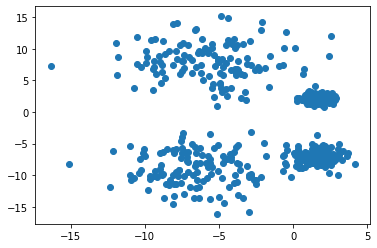

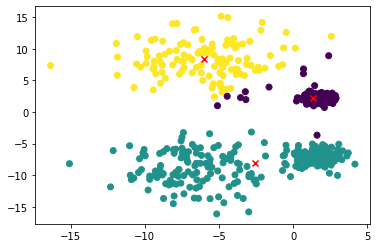

In [10]:
 # ZAD 1
X=generate_data(500, 3)  
plt.figure()
plt.scatter(X[:,0], X[:,1])  

plt.figure()
kmeans = KMeans(n_clusters=3, random_state=0).fit(X) 
y_predict=kmeans.fit_predict(X)    
plt.scatter(X[:,0],X[:,1],c=y_predict)  
                                        
centroids = kmeans.cluster_centers_     
plt.scatter(centroids[:, 0], centroids[:, 1],  
            marker='x', color="red")
print(centroids)

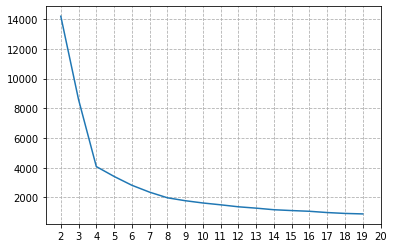

In [11]:
# ZAD 2
KF=[]   
CL=[]  
for i in range(2,20):
    kmeans=KMeans(n_clusters=i) 
    kmeans.fit(X)  
    CL.append(i)
    KF.append(kmeans.inertia_)  
plt.figure()

plt.plot(CL, KF) 
plt.xticks(np.arange(min(CL), max(CL)+2, 1))   
plt.grid(linestyle='--')      

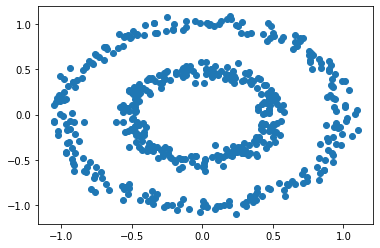

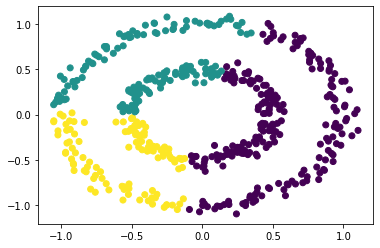

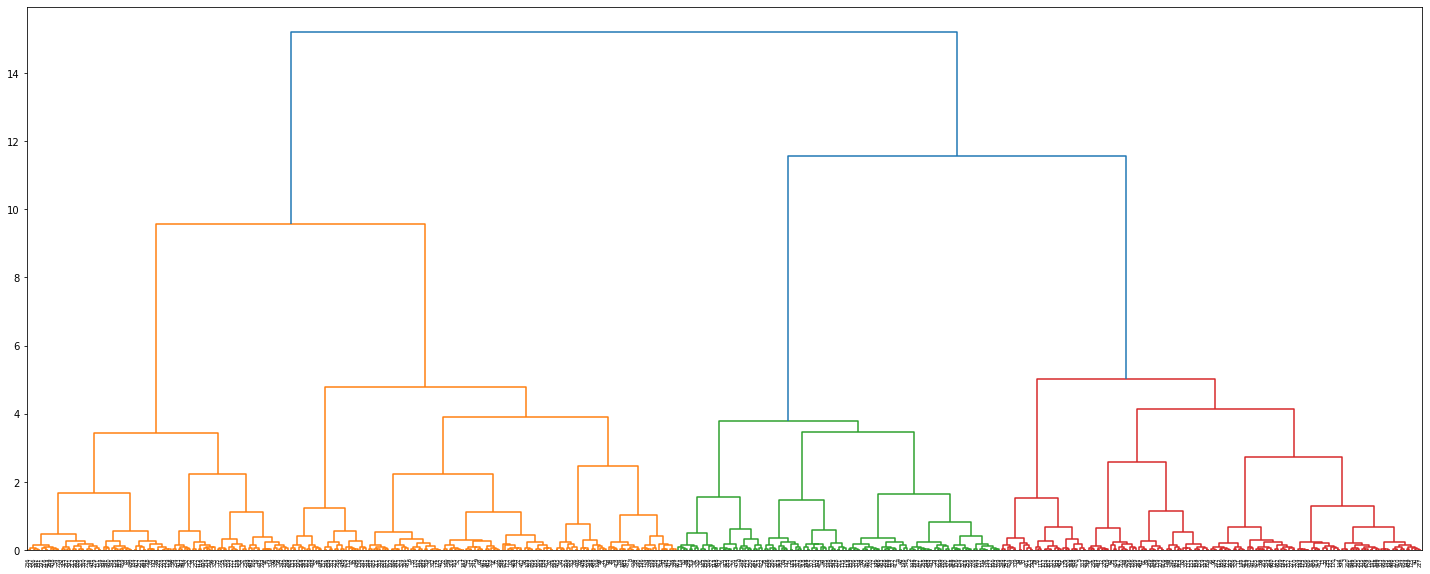

In [13]:
# ZAD 3
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

X=generate_data(500, 4)  

plt.figure()
plt.scatter(X[:,0], X[:,1])  
hierar_cl = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(X)

plt.figure()
y_predict1=hierar_cl.fit_predict(X)    
plt.scatter(X[:,0],X[:,1],c=y_predict1)  

Xl = linkage(X, 'ward');
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Xl);
plt.show()

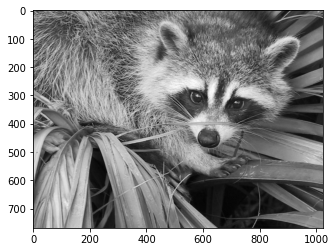

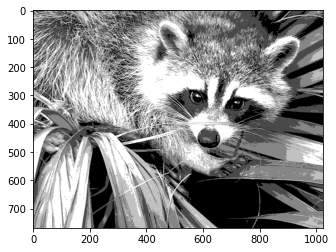

In [14]:
import scipy as sp
from sklearn import cluster, datasets
import numpy as np
import matplotlib.pyplot as plt
try:
    face = sp.face(gray=True)
except AttributeError:
    from scipy import misc
    face = misc.face(gray=True)

X = face.reshape((-1, 1)) # We need an (n_sample, n_feature) array
k_means = cluster.KMeans(n_clusters=5,n_init=1)
k_means.fit(X)
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape
plt.figure(1)
plt.imshow(face, cmap='gray')
plt.figure(2)
plt.imshow(face_compressed, cmap='gray')

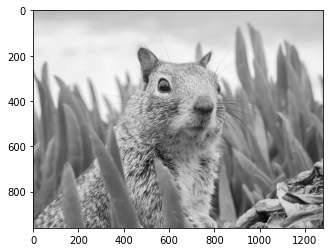

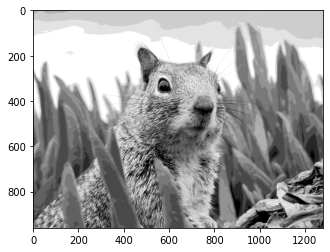

In [16]:
import matplotlib.image as mpimg
import sys

imageNew = mpimg.imread('example_grayscale.png')
X = imageNew.reshape((-1, 1)) # We need an (n_sample, n_feature) array
k_means = cluster.KMeans(n_clusters=10,n_init=1)
k_means.fit(X)
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
imageNew_compressed = np.choose(labels, values)
imageNew_compressed.shape = imageNew.shape
plt.figure(1)
plt.imshow(imageNew, cmap='gray')
plt.figure(2)
plt.imshow(imageNew_compressed, cmap='gray')

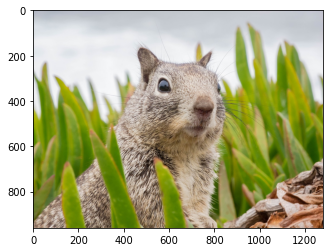

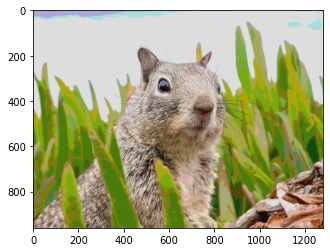

In [17]:
imageNew = mpimg.imread('example.png')
X = imageNew.reshape((-1, 1)) # We need an (n_sample, n_feature) array
k_means = cluster.KMeans(n_clusters=5,n_init=1)
k_means.fit(X)
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
imageNew_compressed = np.choose(labels, values)
imageNew_compressed.shape = imageNew.shape
plt.figure(1)
plt.imshow(imageNew, cmap='gray')
plt.figure(2)
plt.imshow(imageNew_compressed, cmap='gray')